In [8]:
#%% import modules

import numpy as np
import xarray as xr
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import pandas as pd
import matplotlib.cm as cm


In [9]:

def _plot_individual_location_curve_with_uncertainty(ds, scenario, 
                                    location, color, label_name):
    
    end_year = 2100
    mm2m = 1/1000
    slr = ds['sea_level_change'].sel(locations=location) * mm2m
    slr = slr.sel(years=slice(2020,end_year))
    years = slr['years'].sel(years=slice(2020,end_year)).values
    
    plt.plot(years,
             slr.sel(quantiles=0.5),
        color=color,
        # no label
        #label=label_name
        )
    # slr.sel(quantiles=0.05).sel(years=2050)

def _plot_individual_location_curve_with_uncertainty(ds, scenario, 
                                    location, color, label_name):
    
    end_year = 2100
    mm2m = 1/1000
    slr = ds['sea_level_change'].sel(locations=location) * mm2m
    slr = slr.sel(years=slice(2020,end_year))
    years = slr['years'].sel(years=slice(2020,end_year)).values
    
    #plt.figure(figsize=(10,6))
    
    plt.plot(years,
             slr.sel(quantiles=0.5),
        color=color,
        label=label_name
        )
        
    if scenario=='ssp370' and label_name=="La Rochelle":

        plt.fill_between(
                        years, 
                        slr.sel(quantiles=0.17), 
                        slr.sel(quantiles=0.83), 
                          alpha=0.5,
                          color="grey",
                          #color=color,
                          label='17-83% confidence interval'
                          )

        plt.fill_between(
                        years, 
                        slr.sel(quantiles=0.05), 
                        slr.sel(quantiles=0.95), 
                          alpha=0.2,
                          color="grey",
                          #color=color,
                          label='5-95% confidence interval'
                          )

        
def plot_for_scenario(scenario):
    
    input_dir = '/Users/annalea_albright/Dropbox/BPCE/Data/ar6-regional-confidence/regional/confidence_output_files/medium_confidence/'
    fp = os.path.join(input_dir, 
          f'{scenario}/total_{scenario}_medium_confidence_values.nc')
    ds = xr.open_dataset(fp)
    
    for i in range(len(location_data.gauge_number)):

       _plot_individual_location_curve(ds,
                                       scenario,
           location=location_data['gauge_number'].isel(gauge_number=i).values, 
           color = str(location_data['color'].isel(gauge_number=i).values),
           label_name=location_data['gauge_name'].isel(gauge_number=i).values
                           )

def plot_for_scenario_with_unc(scenario):
    
    input_dir = '/Users/annalea_albright/Dropbox/BPCE/Data/ar6-regional-confidence/regional/confidence_output_files/medium_confidence/'
    fp = os.path.join(input_dir, 
          f'{scenario}/total_{scenario}_medium_confidence_values.nc')
    ds = xr.open_dataset(fp)
    
    for i in range(len(location_data.gauge_number)):

       _plot_individual_location_curve_with_uncertainty(ds,
                                       scenario,
           location=location_data['gauge_number'].isel(gauge_number=i).values, 
           color = str(location_data['color'].isel(gauge_number=i).values),
           label_name=location_data['gauge_name'].isel(gauge_number=i).values
                           )
#%%        

In [7]:

# scatter plot of locations
# average

sns.set(context='talk', style='white', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

#%% define locations and other attributes 

# under file : location_list.lst

#CHERBOURG	467	49.65	-1.64
#LE_HAVRE	453	49.48	0.11
#DUNKERQUE	468	51.05	2.37
#BREST	1	48.38	-4.49
#ST. NAZAIRE	457	47.27	-2.20
#LA_ROCHELLE-LA_PALLICE	466	46.16	-1.22
#ST_JEAN_DE_LUZ	469	43.40	-1.68
#MARSEILLE	61	43.28	5.35
#TOULON	980	43.11	5.91
#NICE	1468	43.70	7.29

# should add these 3 too
#CALAIS	455	50.97	1.87
#BOULOGNE	471	50.73	1.58
#DIEPPE	474	49.93	1.08

gauge_name = ['Cherbourg', 'Le_Havre', 'Dunkerque', 'Brest', 'St_Nazaire',
              'La Rochelle', 'St_Jean-de-Luz', 'Marseille', 'Toulon', 'Nice']


gauge_number = [467, 453, 468, 1, 457, 466, 469, 61, 980, 1468]


lats = [49.65, 49.48, 51.05, 48.38, 47.27, 46.16, 43.40, 43.28, 43.11, 43.70]

lons = [-1.64, 0.11, 2.37, -4.49, -2.20, -1.22, -1.68, 5.35, 5.91, 7.29]

#np.random.seed(10)
#colors = np.asarray([(np.random.random(size=3) * 256) for i in range(12)])
colors = ['turquoise', 'deeppink', 'crimson', 'indigo',
          'gold', 'green','lime', 'royalblue','peru', 'lightskyblue',
          #'navy', 'slategrey',
         ]
alphas = [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
location_data = xr.Dataset(
    data_vars={
        "gauge_name": (("gauge_number"), gauge_name),
        "lat": (("gauge_number"), lats),
        "lon": (("gauge_number"), lons),
        "color": (("gauge_number"), colors),
                #"alpha": (("gauge_number"), alphas),


    },
    coords={"gauge_number": gauge_number},
)
print(location_data)

<xarray.Dataset>
Dimensions:       (gauge_number: 10)
Coordinates:
  * gauge_number  (gauge_number) int64 467 453 468 1 457 466 469 61 980 1468
Data variables:
    gauge_name    (gauge_number) <U14 'Cherbourg' 'Le_Havre' ... 'Toulon' 'Nice'
    lat           (gauge_number) float64 49.65 49.48 51.05 ... 43.28 43.11 43.7
    lon           (gauge_number) float64 -1.64 0.11 2.37 ... 5.35 5.91 7.29
    color         (gauge_number) <U12 'turquoise' 'deeppink' ... 'lightskyblue'


([<matplotlib.axis.YTick at 0x179daa050>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

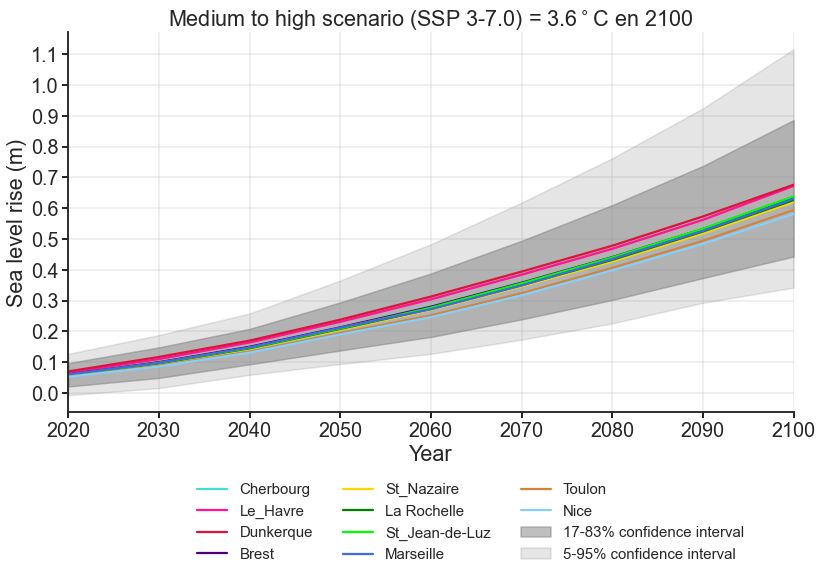

In [10]:

#%% just one scenario 
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

plt.figure(figsize=(13,7))
plot_for_scenario_with_unc(scenario ='ssp370')
plt.legend(loc="best", frameon=False, 
           bbox_to_anchor=(0.95, -0.15),
           ncol=3, 
           fontsize=15)
plt.grid(True, alpha=0.4)
plt.ylabel('Sea level rise (m)')
plt.xlim([2020, 2100])
plt.xlabel("Year")
sns.despine()
#plt.title('Scenario SSP 3-7.0')
plt.title('Medium to high scenario (SSP 3-7.0) = 3.6$^\circ$C en 2100')
plt.yticks(np.arange(0, 1.2,0.1))

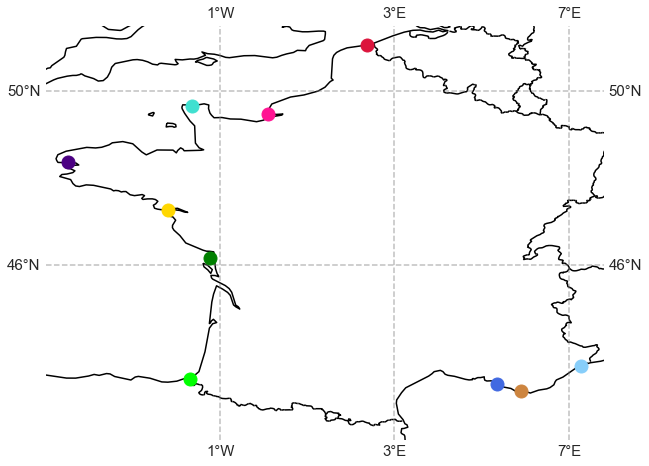

In [11]:
import cartopy.feature as cf

sns.set_context("talk")
sns.set_style("white")

# can you select an xarray dataset based on shapefile?
# https://gis.stackexchange.com/questions/357490/mask-xarray-dataset-using-a-shapefile
# have a shapefile of the French coast

fig,ax = plt.subplots(
    figsize=(10,15),
    subplot_kw={'projection':ccrs.PlateCarree()},
                      
)

ax.coastlines(resolution='50m')
ax.add_feature(cf.BORDERS)
lon_left, lon_right = -5, 7.8
lat_S, lat_N = 42, 51.5
ax.set_extent([lon_left, lon_right, lat_S, lat_N])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
gl = ax.gridlines(color='Grey',draw_labels=True, alpha=0.5, linestyle='--')
gl_space = 4
gl.xlocator = mticker.FixedLocator(np.arange(lon_left-gl_space, lon_right+gl_space, gl_space))
gl.ylocator = mticker.FixedLocator(np.arange(lat_S-gl_space, lat_N+gl_space, gl_space))
fs = 15
gl.xlabel_style = {'size': fs}
gl.ylabel_style = {'size': fs}
# add border of France

for i in range(10):
    plt.plot(location_data.lon[i], 
                location_data.lat[i], 
                color=str(location_data.color[i].values), 
             marker='o',
             ms=13,
             #s=200
               )

ax.axis('off')
right_side = ax.spines["right"]
right_side.set_visible(False)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.box(on=None)

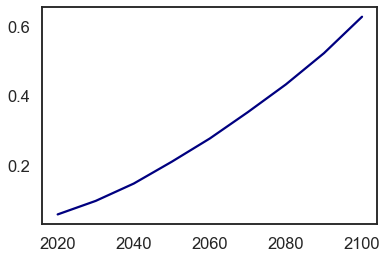

In [12]:
scenario ='ssp370'
input_dir = '/Users/annalea_albright/Dropbox/BPCE/Data/ar6-regional-confidence/regional/confidence_output_files/medium_confidence/'
fp = os.path.join(input_dir, 
      f'{scenario}/total_{scenario}_medium_confidence_values.nc')
ds = xr.open_dataset(fp)

location = 467
color="navy"
label_name="Cherbourg"
end_year = 2100
mm2m = 1/1000
slr = ds['sea_level_change'].sel(locations=location) * mm2m
slr = slr.sel(years=slice(2020,end_year))
years = slr['years'].sel(years=slice(2020,end_year)).values

plt.plot(years,
         slr.sel(quantiles=0.5),
    color=color,
    # no label
    #label=label_name
    )

/var/folders/8t/v51849h92dsb7qvyx0cxz_d40000gn/T/ipykernel_25098/921668741.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['Year', 'SLR', '', ''], axis=1, inplace=True)


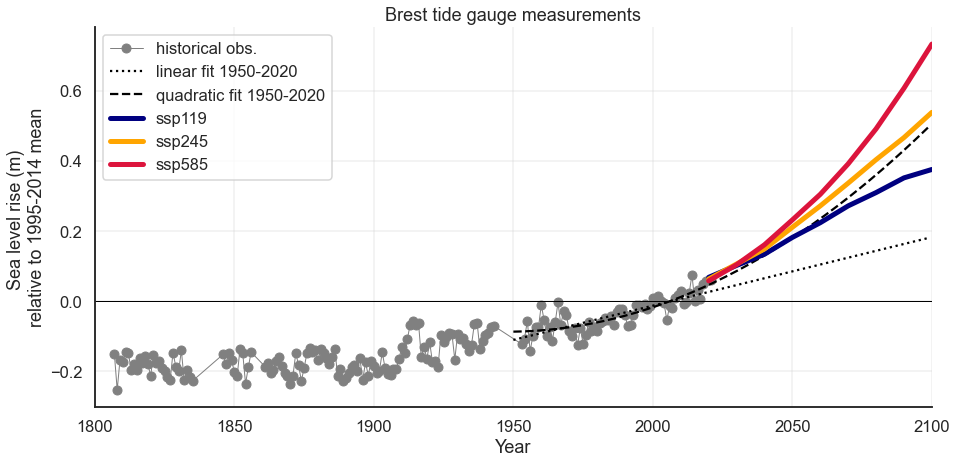

In [16]:
#%% read Brest text file

# data are in mm, convert to m

input_dir = '/Users/annalea_albright/Dropbox/BPCE/Data/'
fp_gauge_Brest = os.path.join(input_dir, '1.rlrdata.txt')
    
df=pd.read_csv(fp_gauge_Brest, sep=';', header=None,)
#print(df.head())
df.set_axis(['Year', 'SLR', '', ''], axis=1, inplace=True)
#df.set_index('Year', inplace=True)
df = df[["Year", "SLR"]]
df.set_index('Year', inplace=True)
df.replace(-99999,np.NaN, inplace=True)
#print(df.head())
#print(df.tail())

# find mean 1995-2014
rebase_mean = df[df.index.isin(np.arange(1995,2015))].mean().values[0]
df_rb = df - rebase_mean
df_rb.dropna(inplace=True)

plt.figure(figsize=(15,7))
(df_rb["SLR"]/1000).plot(marker='o',
                         #ms=12,
                         linewidth=1, 
                         color="gray",
                         label="historical obs."
                         )

# fit a dotted line to 1890-last year mean
from sklearn import linear_model
x_start = 1950
x_end = 2020
x = df_rb.index[df_rb.index.isin(np.arange(x_start,x_end))].values
y = df_rb.SLR[df_rb.index.isin(np.arange(x_start,x_end))].values/1000
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
x_new = np.arange(x_start, 2100)
x_new = x_new.reshape(len(x_new), 1)
plt.plot(x_new, regr.predict(x_new), color='black', 
         linestyle='dotted', 
         label=f"linear fit {x_start}-{x_end}"
         #linewidth=1
         )

x_start = 1950
x_end = 2020
x_exp=df_rb.index[df_rb.index.isin(np.arange(x_start,x_end))].values
y_exp=df_rb["SLR"][df_rb.index.isin(np.arange(x_start,x_end))].values/1000

# calculate polynomial
z = np.polyfit(x_exp, y_exp, 2)
f = np.poly1d(z)
y_new = f(x_new)
plt.plot(
    x_new, 
         y_new, color="black", linestyle="dashed",
         label=f"quadratic fit {x_start}-{x_end}",
         )


plt.ylabel('Sea level rise (m) \n relative to 1995-2014 mean ')
plt.xlabel('Year')
sns.despine()
plt.title('Brest tide gauge measurements')

scenarios = ['ssp119', 'ssp245', 'ssp585']
colors = ['navy', 'orange', 'crimson']

for scenario, color in zip(scenarios, colors):
    input_dir = '/Users/annalea_albright/Dropbox/BPCE/Data/ar6-regional-confidence/regional/confidence_output_files/medium_confidence/'
    fp = os.path.join(input_dir, 
          f'{scenario}/total_{scenario}_medium_confidence_values.nc')
    ds = xr.open_dataset(fp)
    
    end_year = 2100
    mm2m = 1/1000
    location=1
    slr = ds['sea_level_change'].sel(locations=location) * mm2m
    slr = slr.sel(years=slice(2020,end_year))
    years = slr['years'].sel(years=slice(2020,end_year)).values
    
    # if scenario=="ssp245":
    #     plt.fill_between(
    #                     years, 
    #                     slr.sel(quantiles=0.17), 
    #                     slr.sel(quantiles=0.83), 
    #                       alpha=0.3,
    #                       color=color,
    #                       #color=color,
    #                       #label='17-83% confidence interval'
    #                       )
        
    #     plt.fill_between(
    #                     years, 
    #                     slr.sel(quantiles=0.05), 
    #                     slr.sel(quantiles=0.95), 
    #                       alpha=0.1,
    #                       color=color,
    #                       #color=color,
    #                       #label='5-95% confidence interval'
    #                       )
    
    plt.plot(years,
             slr.sel(quantiles=0.5),
        color=color,
        linewidth=5,
        label=scenario,
        )
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color="black", linewidth=1)
plt.xlim([1800, 2100])
plt.legend(loc="upper left")
#%% 